In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [ ]:
# wed_df = pd.read_csv("Wednesday-workingHours.pcap_ISCX.csv")
# label = {
#     'BENIGN': 0,
#     'DDoS': 1
# }
# wed_df[' Label'] = wed_df[' Label'].map(label)

# fri_df= pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
# labels = {
#     'BENIGN': 0,
#     'DoS slowloris': 1,
#     'DoS Slowhttptest': 1,
#     'DoS Hulk': 1,
#     'DoS GoldenEye': 1,
#     'Heartbleed': 2
# }
# fri_df[' Label'] = fri_df[' Label'].map(labels)

In [ ]:
# df = pd.concat([wed_df, fri_df], axis=0)

In [ ]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918448 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             918448 non-null  int64  
 1    Flow Duration                918448 non-null  int64  
 2    Total Fwd Packets            918448 non-null  int64  
 3    Total Backward Packets       918448 non-null  int64  
 4   Total Length of Fwd Packets   918448 non-null  int64  
 5    Total Length of Bwd Packets  918448 non-null  int64  
 6    Fwd Packet Length Max        918448 non-null  int64  
 7    Fwd Packet Length Min        918448 non-null  int64  
 8    Fwd Packet Length Mean       918448 non-null  float64
 9    Fwd Packet Length Std        918448 non-null  float64
 10  Bwd Packet Length Max         918448 non-null  int64  
 11   Bwd Packet Length Min        918448 non-null  int64  
 12   Bwd Packet Length Mean       918448 non-null  fl

In [ ]:
# df.columns = df.columns.str.lstrip()

In [ ]:
# label_encoder = preprocessing.LabelEncoder()
# df["Label"]= label_encoder.fit_transform(df["Label"])

In [ ]:
# df=df.drop(["Bwd PSH Flags", "Fwd URG Flags", "Bwd URG Flags", "CWE Flag Count", "Fwd Avg Bytes/Bulk", "Fwd Avg Packets/Bulk", "Fwd Avg Bulk Rate", "Bwd Avg Bytes/Bulk", "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate"],axis=1)


In [ ]:
# df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0


In [ ]:
# df=df.drop(['Flow Bytes/s', 'Flow Packets/s', 'Fwd Packets/s', 'Bwd Packets/s'],axis=1)


In [ ]:
# df = df.reset_index()

In [ ]:
# X = df.drop('Label', axis=1)
# y = df['Label']

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
# Begining of data preprocessing code added by Ahmad
df1 = pd.read_csv('/content/drive/MyDrive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df2 = pd.read_csv("/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv")
df = pd.concat([df1, df2], axis=0)

df.columns = df.columns.str.strip() # Removes unnecessary white space from column names

label = {   # Labelling the target variable with numeric values
    'BENIGN': 0,
    'DDoS': 1,
    'DoS slowloris': 1,
    'DoS Slowhttptest': 1,
    'DoS Hulk': 1,
    'DoS GoldenEye': 1,
    'Heartbleed': 2
}

df['Label'] = df['Label'].map(label) # mapping the labels to their numeric values in df

df = df.dropna() # Removing rows that contain NaN values in df
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)] # Removing rows that contain inf values in df
df = df.loc[:, (df != 0).any(axis=0)] # Removing columns that only contain 0s in df
df.drop(df[df['Label'] == 2].index, inplace = True) # Removing the Heartbleed data (only 11 present)

def replace_port_numbers(x):
     return 1 if x == 80 else 0

df['Destination Port'] = df['Destination Port'].apply(replace_port_numbers)

X = df.drop(columns=['Label'])
y = df['Label']

correlations = abs(X.corrwith(pd.Series(y)))
correlations = correlations.sort_values(ascending=False)
X = X.drop(correlations.index[25:], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# End of data preprocessing code added by Ahmad

In [4]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [5]:
y_pred = rf.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9981681586723512


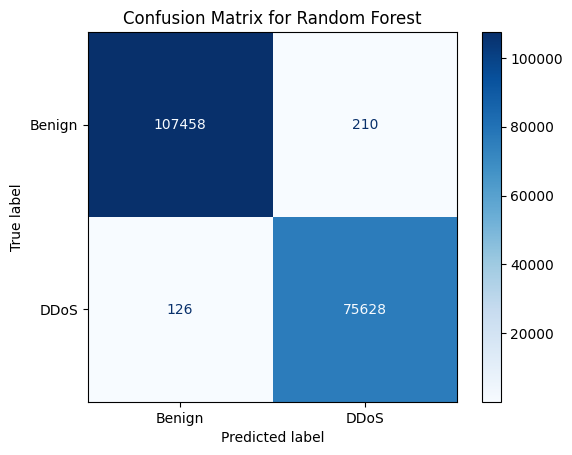

In [9]:
#Beginning of Confusion Matrix: Yesha Modi
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Filter predictions and true labels to include only Benign (0) and DDoS (1)
# y_test_binary = y_test[y_test.isin([0, 1])]
# y_pred_binary = y_pred[np.isin(y_test, [0, 1])].flatten()

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'DDoS'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.show()
#Ending of Confusion Matrix: Yesha Modi

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    107668
           1       1.00      1.00      1.00     75754

    accuracy                           1.00    183422
   macro avg       1.00      1.00      1.00    183422
weighted avg       1.00      1.00      1.00    183422

